# Pyber Challenge

### Loading & Reading CSV files

In [206]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [207]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df,city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5739410000000,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2343910000000,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2005070000000,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5149250000000,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3908450000000,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [189]:
#  1. Get the total rides for each city type
total_rides_type = pyber_data_df.groupby(['type']).count()['ride_id']
total_rides_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [190]:
# 2. Get the total drivers for each city type
total_drivers_type = pyber_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers_type

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [191]:
#  3. Get the total amount of fares for each city type
total_fares_type = pyber_data_df.groupby(['type']).sum()['fare']
total_fares_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [192]:
#  4. Get the average fare per ride for each city type. 
average_fare_per_ride = total_fares_type / total_rides_type
average_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [193]:
# 5. Get the average fare per driver for each city type. 
average_fare_per_driver = total_fares_type / total_drivers_type
average_fare_per_driver

type
Rural       8.059460
Suburban    2.258615
Urban       0.668675
dtype: float64

In [194]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({
            "Total Rides": total_rides_type,
            "Total Drivers": total_drivers_type,
            "Total Fares": total_fare_type,
            "Average Fare per Ride": average_fare_per_ride,
            "Average Fare per Driver": average_fare_per_driver
})
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,537,4327.93,34.623440,8.059460
Suburban,625,8570,19356.33,30.970128,2.258615
Urban,1625,59602,39854.38,24.525772,0.668675


In [195]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [196]:
#  8. Format the columns.
pyber_summary_df['Total Rides'] = pyber_summary_df['Total Rides'].map('{:,}'.format)
pyber_summary_df['Total Drivers'] = pyber_summary_df['Total Drivers'].map('{:,}'.format)
pyber_summary_df['Total Fares'] = pyber_summary_df['Total Fares'].map('${:,.2f}'.format)
pyber_summary_df['Average Fare per Ride'] = pyber_summary_df['Average Fare per Ride'].map('${:,.2f}'.format)
pyber_summary_df['Average Fare per Driver'] = pyber_summary_df['Average Fare per Driver'].map('${:,.2f}'.format)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,537,"$4,327.93",$34.62,$8.06
Suburban,625,"8,570","$19,356.33",$30.97,$2.26
Urban,"1,625","59,602","$39,854.38",$24.53,$0.67


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [197]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5739410000000,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2343910000000,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2005070000000,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5149250000000,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3908450000000,46,Urban


In [198]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
fares_per_date = pyber_data_df.groupby(["type","date"]).sum()["fare"]
fares_per_date.head()

type   date           
Rural  1/1/2019 9:45      43.69
       1/11/2019 4:39     16.42
       1/14/2019 15:58    54.10
       1/14/2019 7:09     18.05
       1/15/2019 21:44    30.26
Name: fare, dtype: float64

In [199]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
fares_per_date = fares_per_date.reset_index()
fares_per_date.head()

,type,date,fare
0,Rural,1/1/2019 9:45,43.69
1,Rural,1/11/2019 4:39,16.42
2,Rural,1/14/2019 15:58,54.10
3,Rural,1/14/2019 7:09,18.05
4,Rural,1/15/2019 21:44,30.26


In [200]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
fares_per_date = fares_per_date.pivot(index="date", columns="type", values="fare")
fares_per_date.head(10)

type,Rural,Suburban,Urban
date,,,
1/1/2019 0:08,NaN,NaN,37.91
1/1/2019 0:46,NaN,47.74,NaN
1/1/2019 12:32,NaN,25.56,NaN
1/1/2019 14:40,NaN,NaN,5.42
1/1/2019 14:42,NaN,NaN,12.31
1/1/2019 14:52,NaN,31.15,NaN
1/1/2019 17:22,NaN,NaN,42.11
1/1/2019 21:04,NaN,NaN,11.71
1/1/2019 2:07,NaN,24.07,NaN


In [205]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
fare_dates_df = fares_per_date.loc['2019-01-01':'2019-04-29']
fare_dates_df

type,Rural,Suburban,Urban
date,,,


In [202]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
type(fare_dates_df.index)

fare_dates_df.index = pd.to_datetime(fare_dates_df.index)
fare_dates_df.head()

type,Rural,Suburban,Urban
date,,,


In [203]:
# 7. Check that the datatype for the index is datetime using df.info()
time_period.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 0 entries
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     0 non-null      float64
 1   Suburban  0 non-null      float64
 2   Urban     0 non-null      float64
dtypes: float64(3)
memory usage: 0.0 bytes


In [105]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
new_time_period = fare_dates_df.resample('w').sum()
new_time_period

type,Rural,Suburban,Urban
date,,,


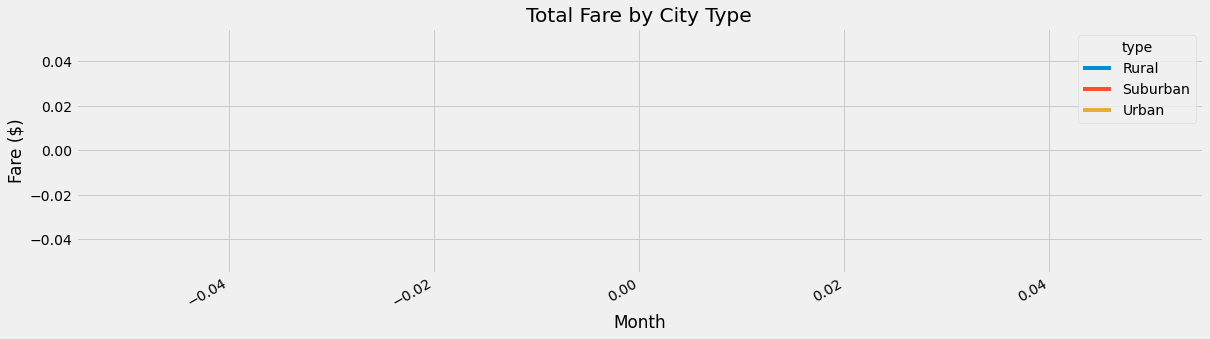

In [106]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

fare_dates_df.plot(figsize=(18,5),)
plt.xlabel('Month')
plt.ylabel('Fare ($)')
plt.title('Total Fare by City Type');